### 2021_10_13_1

In [1]:
from IPython.display import display, Image

### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print(np.__version__)
print(matplotlib.__version__)

1.21.2
3.4.3


In [4]:
# 설치가 안되어 있을 경우, 설치 필요.
import mglearn
import sklearn
print( sklearn.__version__)
print( mglearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

1.0
0.1.9


w[0]: 0.393906  b: -0.031804


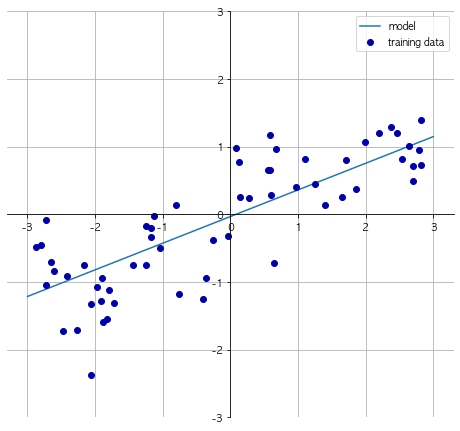

In [5]:
mglearn.plots.plot_linear_regression_wave()

## 02 Boston 데이터 셋을 활용한 회귀 모델 만들어보기

### 데이터 설명
* 1970년대의 보스턴 주변의 주택 평균 가격 예측
* 506개의 데이터 포인트와 13개의 특성

(1) 모델 만들기 [모델명 = 모델객체()] <br>
(2) 모델 학습 시키기 [모델명.fit()] <br>
(3) 모델을 활용한 예측하기 [모델명.predict()] <br>
(4) 모델 평가

In [6]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [8]:
boston = load_boston()
X = boston.data     # 입력 데이터 - 문제
y = boston.target   # 출력 데이터 - 답 

### 데이터 살펴보기

In [11]:
print("X type :", type(X))
print("y type :", type(y))
print("boston keys :", boston.keys())
print("boston feature names :", boston.feature_names)

X type : <class 'numpy.ndarray'>
y type : <class 'numpy.ndarray'>
boston keys : dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
boston feature names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

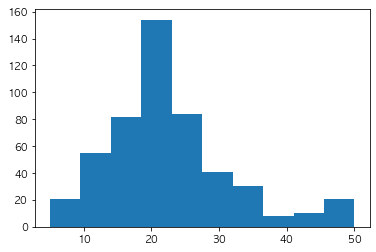

In [12]:
plt.hist(y)

### 데이터 준비하기

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
## model = 모델명()
## model.fit(입력, 레이블)
## pred = model.predict(새로운 데이터 입력)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346])

### MSE(Mean Squared Error) 구하기
* (실제값 - 예측값) ^ 2의 합을 데이터 샘플의 개수로 나누어 준 값

In [15]:
import pandas as pd

In [17]:
dict_dat = {"실제값" : y_test, "예측값" : pred, "오차" : y_test - pred}
dat = pd.DataFrame(dict_dat)
dat.head(3)

,실제값,예측값,오차
0,23.6,28.838854,-5.238854
1,32.4,36.007833,-3.607833
2,13.6,15.083248,-1.483248


In [19]:
dat["오차제곱"] = dat["오차"] * dat["오차"]
mse_val = dat["오차제곱"].sum() / dat.shape[0]
print("MSE :", mse_val)

MSE : 22.098694827098424


### MAE(Mean Absolute Error) 구하기

In [20]:
dat["오차절대값"] = abs(dat["오차"])

In [23]:
mae_val = dat["오차절대값"].sum() / dat.shape[0]
print("MAE :", mae_val)

MAE : 3.0609395954370906


### RMSE(Root Mean Squared Error) 구하기
* (실제값 - 예측값) ^ 2의 합을 데이터 샘플의 개수로 나누어 준 이후에 제곱근 씌우기

In [24]:
rmse_val = mse_val ** 0.5
print("RMSE :", rmse_val)

RMSE : 4.700924890603808


### sklearn으로 MSE 구하기

In [26]:
from sklearn.metrics import mean_squared_error
print("MSE :", mean_squared_error(y_test, pred))

MSE : 22.098694827098424


* MSE : ((실제값 - 예측값) ^ 2 의 전체합) / 데이터 개수
* RMSE : MSE에 루트 씌운 값
* MAE : (실제값 - 예측값)의 절대값 전체합 / 데이터 개수
* RMSLE : RMSE에 실제값과 예측값을 log 처리한 값
    * (log(실제값 + 1) - log(예측값 + 1))

### 결정계수
* 결정계수는 회귀모델에서 모델의 적합도를 의미하는 것으로 0 ~ 1 사이의 값을 갖는다.
* 1에 가까우면 가까울수록 이 모델은 좋다고 할 수 있다.

In [31]:
print("학습용 데이터 결정 계수 : {:.2f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정 계수 : {:.2f}".format(model.score(X_test, y_test)))

학습용 데이터 결정 계수 : 0.75
테스트 데이터 결정 계수 : 0.68


In [37]:
# 9 : 1
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.1,
                                                   random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("학습용 : {}, 테스트용 : {}".format(train_score, test_score))

학습용 : 0.7375152736886281, 테스트용 : 0.7598135533532491


In [39]:
# 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                   random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("학습용 : {}, 테스트용 : {}".format(train_score, test_score))

학습용 : 0.7508856358979672, 테스트용 : 0.6687594935356307


In [40]:
# 7 : 3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.3,
                                                   random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("학습용 : {}, 테스트용 : {}".format(train_score, test_score))

학습용 : 0.7434997532004697, 테스트용 : 0.7112260057484974


In [43]:
## 9 : 1, 8 : 2, 7 : 3, 6 : 4, 5 : 5
for i in range(1, 6, 1) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       test_size = (i / 10),
                                                       random_state = 42)
    model = LinearRegression().fit(X_train, y_train)
    pred = model.predict(X_test)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    mae_val = np.abs(y_test - pred).sum() / len(pred)
    mse_val = ((y_test - pred) ** 2).sum() / len(pred)
    rmse_val = mse_val ** 0.5
    
    print(f"학습용 : {10 - i}, 테스트용 : {i}")
    print("학습용 : {}, 테스트용 : {}".format(train_score, test_score))
    print("MAE : {}".format(mae_val))
    print("MSE : {}".format(mse_val))
    print("RMSE : {}".format(rmse_val))
    print()

학습용 : 9, 테스트용 : 1
학습용 : 0.7375152736886281, 테스트용 : 0.7598135533532491
MAE : 2.8342104578589455
MSE : 14.995852876582541
RMSE : 3.8724479178657187

학습용 : 8, 테스트용 : 2
학습용 : 0.7508856358979672, 테스트용 : 0.6687594935356307
MAE : 3.189091965887853
MSE : 24.291119474973616
RMSE : 4.9286021826653466

학습용 : 7, 테스트용 : 3
학습용 : 0.7434997532004697, 테스트용 : 0.7112260057484974
MAE : 3.162709871457369
MSE : 21.517444231176903
RMSE : 4.638689926172788

학습용 : 6, 테스트용 : 4
학습용 : 0.747199884740759, 테스트용 : 0.712514093611121
MAE : 3.2979696834924255
MSE : 21.832709989577538
RMSE : 4.672548554009635

학습용 : 5, 테스트용 : 5
학습용 : 0.7719887864238001, 테스트용 : 0.6896917482875751
MAE : 3.3981670968811883
MSE : 25.175390536117
RMSE : 5.017508399207419

